## Importing the libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

## Loading the dataset

In [10]:
# Load your time series data into a DataFrame
# Replace 'your_data.csv' with the actual file or data source.
df = pd.read_csv('../Datasets/train.csv')
df = df.iloc[:1826,3:]


## Augmented Dickey Fuller test for finding out whether the dataset is stationary or not

In [11]:
# Perform the ADF test
result = adfuller(df['sales'])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Compare the p-value to a significance level (e.g., 0.05) for the inference
if p_value <= 0.05:
    print("Reject the null hypothesis: Data is stationary.")
else:
    print("Fail to reject the null hypothesis: Data is non-stationary.")


ADF Statistic: -3.157670556332807
p-value: 0.022569380626571333
Reject the null hypothesis: Data is stationary.


## The Autocorrelation plot 

<Figure size 1200x600 with 0 Axes>

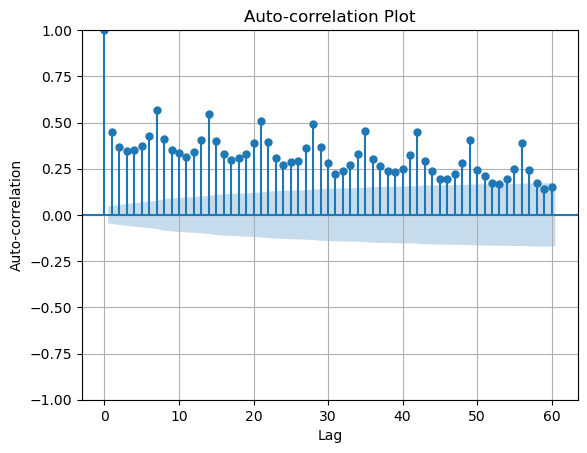

In [53]:
# Calculate and plot auto-correlation
plt.figure(figsize=(12, 6))
plot_acf(df['sales'], lags=60) 
plt.title('Auto-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.grid(True)
plt.show()


inference :The auto correlation plot tells that there is a correlation between the lags since it has a positive correlation.Also the plot will help us find the q value(order of moving averages).This q value is calculated when the lag falls below the significance level.In this plot we can see that the q value is approximately 58

## The partial autocorrelation plot

<Figure size 1200x600 with 0 Axes>

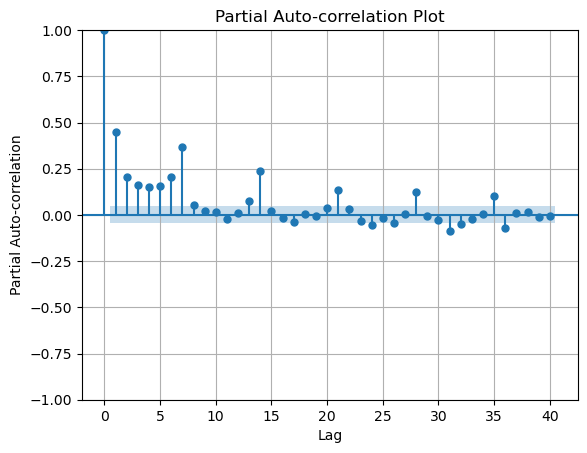

In [46]:
plt.figure(figsize=(12,6))
plot_pacf(df['sales'], lags=40)
plt.title('Partial Auto-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Auto-correlation')
plt.grid(True)
plt.show()

Next we will draw a plot with a lag of 10 units so that we will be able to exactly observe where the correlation value falls below the significance/confidence level

<Figure size 1200x600 with 0 Axes>

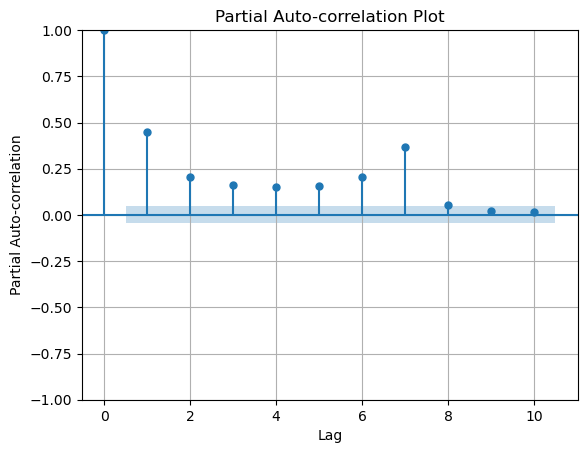

In [48]:
plt.figure(figsize=(12,6))
plot_pacf(df['sales'], lags=10)
plt.title('Partial Auto-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Auto-correlation')
plt.grid(True)
plt.show()

Inference: The partial auto-correlation function plot is used to find the p - value(the autoregressive component).The value after which the spike drops
below the significant level is generally considered to be the p - value.  

## Using mean and variance to check if the dataset is stationary or not

In [13]:
X = df.values

In [17]:
split = int(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()

In [18]:
mean1 

18.018619934282587

In [19]:
mean2

21.924424972617743

In [20]:
var1

36.36438495193559

In [21]:
var2

46.84094777996782

## ARIMA model

In [55]:
from statsmodels.tsa.arima.model import ARIMA

In [60]:
model = ARIMA(df,order=(8,0,58))
model_fit = model.fit()

/Users/surya/anaconda3/envs/tf/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                ARIMA(8, 0, 58)   Log Likelihood               -5402.531
Date:                Tue, 31 Oct 2023   AIC                          10941.062
Time:                        23:50:09   BIC                          11315.734
Sample:                             0   HQIC                         11079.268
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9529      1.823     10.945      0.000      16.380      23.526
ar.L1          0.5349      0.456      1.172      0.241      -0.360       1.430
ar.L2         -0.0215      0.013     -1.607      0.1

In [65]:
forecast_steps = 40  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

In [66]:
forecast

1826    14.022699
1827    16.575162
1828    15.045395
1829    16.410156
1830    16.667307
1831    20.977109
1832    19.853176
1833    11.606544
1834    15.649137
1835    13.632666
1836    15.973346
1837    16.190155
1838    19.505076
1839    19.528010
1840    14.059260
1841    16.473399
1842    15.757749
1843    15.624751
1844    17.222249
1845    20.751482
1846    21.498457
1847    13.644868
1848    15.301543
1849    16.171216
1850    15.801074
1851    16.435888
1852    20.725303
1853    20.188272
1854    13.049964
1855    14.466923
1856    14.258466
1857    14.689307
1858    16.517010
1859    20.541161
1860    19.983816
1861    13.358191
1862    14.865266
1863    15.432396
1864    15.407242
1865    17.247304
Name: predicted_mean, dtype: float64

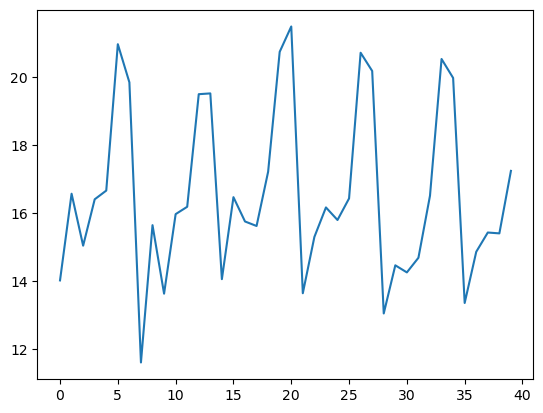

In [68]:
x = [i for i in range(40)]
plt.plot(x,forecast)